In [ ]:
!pip install streamlit
!pip install tensorflow
!pip install pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Giả sử bạn đã có bộ dữ liệu huấn luyện và validation
train_data_dir = '/content/drive/MyDrive/BTL_AI/DATA/Train'
validation_data_dir = '/content/drive/MyDrive/BTL_AI/DATA/Validation'

# Tạo ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Tạo mô hình đơn giản
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile mô hình
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Lưu mô hình
model.save('/content/model.h5')


Found 317 images belonging to 5 classes.
Found 81 images belonging to 5 classes.
Epoch 1/10
 2/10 [=====>........................] - ETA: 1:44 - loss: 12.5358 - accuracy: 0.1875

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 [==============================] - 162s 18s/step - loss: 6.6710 - accuracy: 0.2240 - val_loss: 1.5944 - val_accuracy: 0.2346
Epoch 2/10
10/10 [==============================] - 44s 4s/step - loss: 1.4908 - accuracy: 0.4543 - val_loss: 1.4156 - val_accuracy: 0.3951
Epoch 3/10
10/10 [==============================] - 40s 4s/step - loss: 0.9166 - accuracy: 0.7539 - val_loss: 1.2443 - val_accuracy: 0.5062
Epoch 4/10
10/10 [==============================] - 42s 4s/step - loss: 0.3294 - accuracy: 0.9085 - val_loss: 0.7750 - val_accuracy: 0.7160
Epoch 5/10
10/10 [==============================] - 39s 4s/step - loss: 0.1066 - accuracy: 0.9811 - val_loss: 1.2567 - val_accuracy: 0.6173
Epoch 6/10
10/10 [==============================] - 46s 4s/step - loss: 0.0370 - accuracy: 0.9968 - val_loss: 0.9623 - val_accuracy: 0.6667
Epoch 7/10
10/10 [==============================] - 40s 4s/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.4106 - val_accuracy: 0.5926
Epoch 8/10
10/10 [===========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install gdown
# Tải mô hình từ Google Drive
!gdown --id '/content/model.h5' -O 'model.h5'

# Cài đặt các thư viện cần thiết
!pip install streamlit pyngrok tensorflow pillow

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=/content/model.h5

but Gdown can't. Please check connections and permissions.


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Tải mô hình đã được huấn luyện
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model('/content/model.h5')
    return model

model = load_model()

st.title('Phân loại phương tiện giao thông')

st.write('Đây là ứng dụng đơn giản để nhận diện và phân loại phương tiện giao thông.')

uploaded_file = st.file_uploader("Chọn một bức ảnh...", type=['jpg', 'jpeg', 'png'])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Ảnh đã upload', use_column_width=True)

    if st.button('Phân loại'):
        st.write("Đang phân loại...")
        img = image.resize((224, 224))  # Điều chỉnh kích thước ảnh theo yêu cầu của mô hình
        img = np.array(img)
        img = np.expand_dims(img, axis=0)

        predictions = model.predict(img)
        class_names = ['Bike', 'Bus', 'Car', 'Motorbike','Truck']  # Thay đổi theo các lớp mà mô hình của bạn phân loại
        predicted_class = class_names[np.argmax(predictions)]

        st.write(f'Phương tiện được phân loại là: {predicted_class}')

Writing app.py


In [ ]:
# Cài đặt ngrok authtoken
!ngrok authtoken 2i997RrWYZ65Cpm0U8fKPXvlM5h_3BH5bsv5XrvgkZkGrmysa

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Khởi động ngrok với cấu hình HTTP v2 đúng
ngrok_tunnel = ngrok.connect(8501, "http")
public_url = ngrok_tunnel.public_url
print(f"Streamlit app URL: {public_url}")

# Khởi động Streamlit
!streamlit run app.py &>/dev/null&

Streamlit app URL: https://8a02-35-197-8-54.ngrok-free.app


In [ ]:
# Đánh giá cơ bản
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Tải mô hình đã huấn luyện
model = load_model('/content/model.h5')

# Đường dẫn đến bộ dữ liệu kiểm tra
test_data_dir = '/content/drive/MyDrive/BTL_AI/DATA/Validation'

# Chuẩn bị bộ dữ liệu kiểm tra
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Dự đoán trên bộ dữ liệu kiểm tra
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Lấy nhãn đúng của bộ dữ liệu kiểm tra
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Tính toán các chỉ số đánh giá
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Hiển thị các chỉ số đánh giá
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Found 81 images belonging to 5 classes.
3/3 [==============================] - 5s 695ms/step
Classification Report:
               precision    recall  f1-score   support

        Bike       1.00      0.71      0.83        17
         Bus       0.53      0.71      0.61        14
         Car       0.69      0.60      0.64        15
   Motorbike       0.82      0.64      0.72        14
       Truck       0.77      0.95      0.85        21

    accuracy                           0.74        81
   macro avg       0.76      0.72      0.73        81
weighted avg       0.77      0.74      0.74        81

Confusion Matrix:
 [[12  2  1  1  1]
 [ 0 10  3  0  1]
 [ 0  2  9  1  3]
 [ 0  4  0  9  1]
 [ 0  1  0  0 20]]


In [ ]:
# Đánh giá nâng cao
!pip install tensorflow scikit-learn matplotlib


Found 81 images belonging to 5 classes.
3/3 [==============================] - 4s 803ms/step
Classification Report:
               precision    recall  f1-score   support

        Bike       1.00      0.71      0.83        17
         Bus       0.53      0.71      0.61        14
         Car       0.69      0.60      0.64        15
   Motorbike       0.82      0.64      0.72        14
       Truck       0.77      0.95      0.85        21

    accuracy                           0.74        81
   macro avg       0.76      0.72      0.73        81
weighted avg       0.77      0.74      0.74        81

Confusion Matrix:
 [[12  2  1  1  1]
 [ 0 10  3  0  1]
 [ 0  2  9  1  3]
 [ 0  4  0  9  1]
 [ 0  1  0  0 20]]


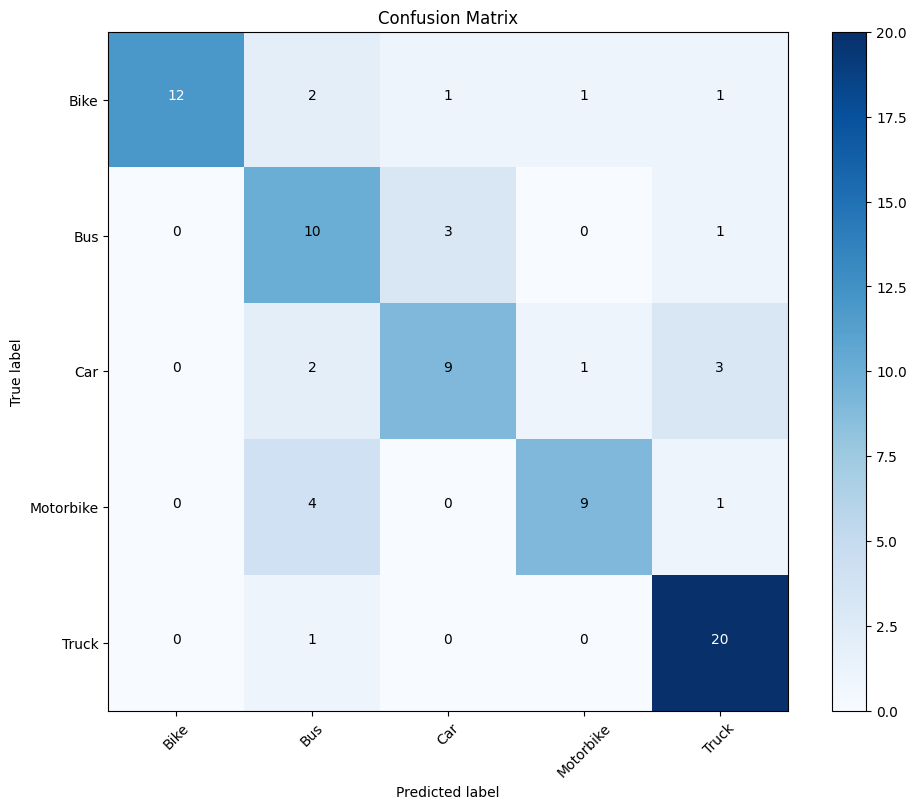

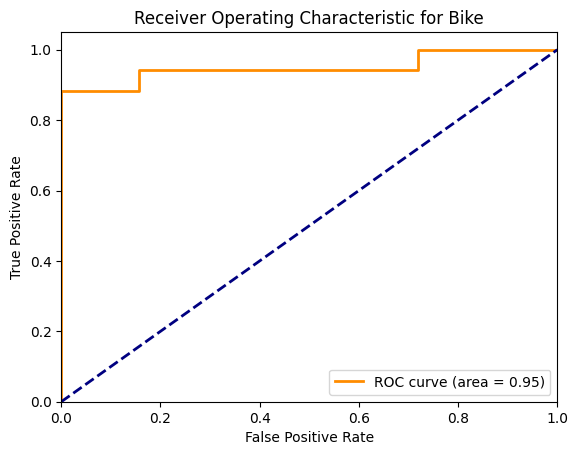

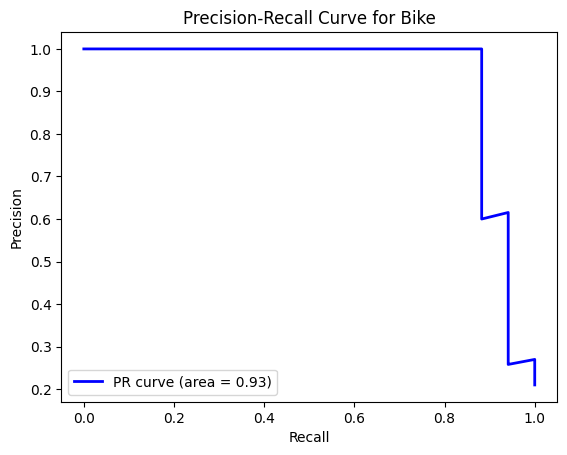

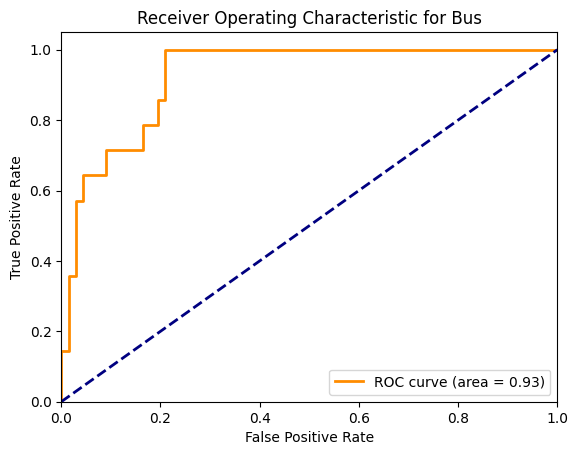

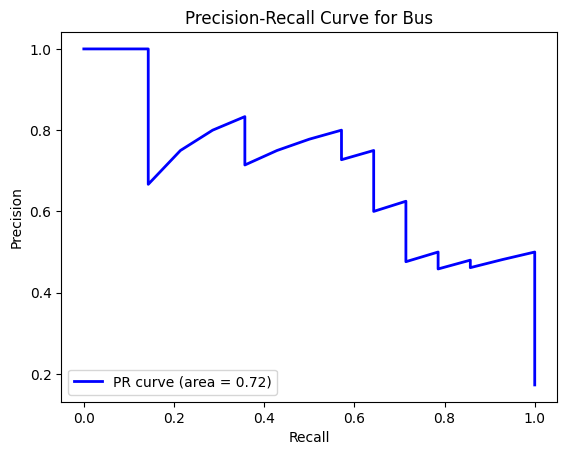

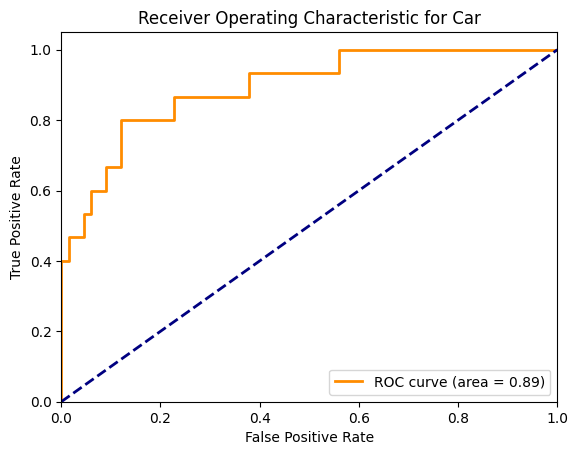

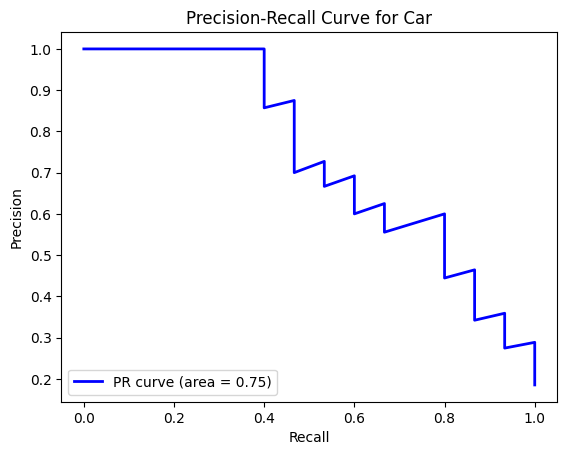

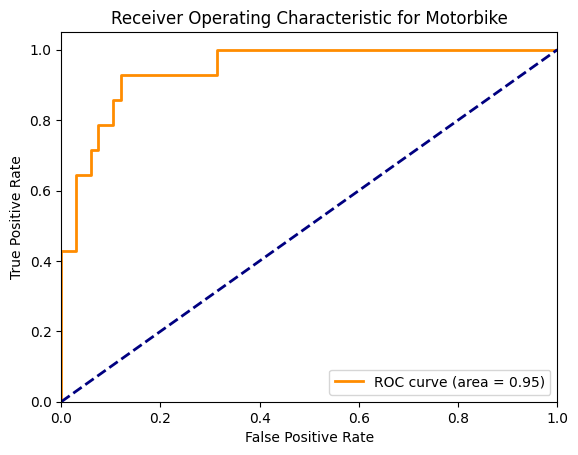

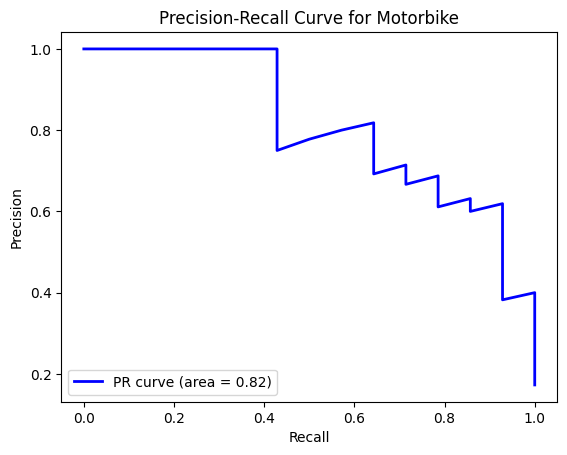

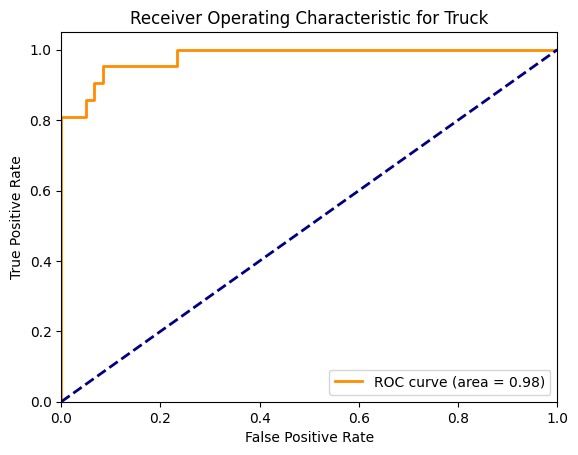

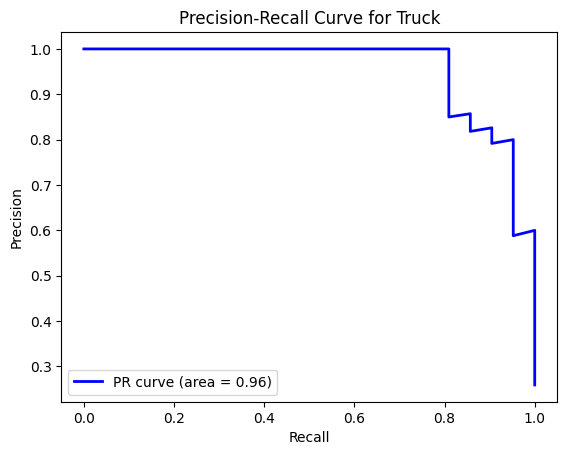

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Tải mô hình đã huấn luyện
model = load_model('/content/model.h5')

# Đường dẫn đến bộ dữ liệu kiểm tra
test_data_dir = '/content/drive/MyDrive/BTL_AI/DATA/Validation'

# Chuẩn bị bộ dữ liệu kiểm tra
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Dự đoán trên bộ dữ liệu kiểm tra
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Lấy nhãn đúng của bộ dữ liệu kiểm tra
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Tính toán các chỉ số đánh giá
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Hiển thị các chỉ số đánh giá
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

# Vẽ Confusion Matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Đánh số lên các ô của confusion matrix
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Vẽ ROC và PR curve cho mỗi lớp
for i, class_name in enumerate(class_labels):
    # Tính ROC curve và AUC
    fpr, tpr, _ = roc_curve(true_classes == i, predictions[:, i])
    roc_auc = auc(fpr, tpr)

    # Tính PR curve và Average Precision
    precision, recall, _ = precision_recall_curve(true_classes == i, predictions[:, i])
    avg_precision = average_precision_score(true_classes == i, predictions[:, i])

    # Vẽ ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {class_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Vẽ PR curve
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % avg_precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {class_name}')
    plt.legend(loc="lower left")
    plt.show()
